In [1]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a longitude and latitude combination
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# pair them together
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
#Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


616

## Get the city Weather Data 

In [6]:
# Import Dependencies and Initialize an empty list and Counters.
import requests

# Import the APi Key
from config import weather_api_key

from datetime import datetime

In [7]:
# Starting URL for for weather map API call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c45661bf65d270f100a19490c6037b66


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters 
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | avdiyivka
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | gazni
City not found. Skipping...
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | saint george
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | high level
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 19 of Set 1 | goundi
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | ea

Processing Record 36 of Set 4 | paravola
Processing Record 37 of Set 4 | kavaratti
Processing Record 38 of Set 4 | nikolskoye
Processing Record 39 of Set 4 | port moresby
Processing Record 40 of Set 4 | zhigansk
Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | taonan
Processing Record 43 of Set 4 | jieshi
Processing Record 44 of Set 4 | wanning
Processing Record 45 of Set 4 | ximei
Processing Record 46 of Set 4 | phangnga
Processing Record 47 of Set 4 | broome
Processing Record 48 of Set 4 | kailua
Processing Record 49 of Set 4 | oistins
Processing Record 50 of Set 4 | caravelas
Processing Record 1 of Set 5 | berlevag
Processing Record 2 of Set 5 | nguiu
City not found. Skipping...
Processing Record 3 of Set 5 | buala
Processing Record 4 of Set 5 | morgan city
Processing Record 5 of Set 5 | santa maria da vitoria
Processing Record 6 of Set 5 | redmond
Processing Record 7 of Set 5 | svetlaya
Processing Record 8 of Set 5 | saint-joseph
Processing Record 9 of Set 5

Processing Record 28 of Set 8 | porterville
Processing Record 29 of Set 8 | bissau
Processing Record 30 of Set 8 | srivardhan
Processing Record 31 of Set 8 | mezhdurechensk
Processing Record 32 of Set 8 | keetmanshoop
Processing Record 33 of Set 8 | anito
Processing Record 34 of Set 8 | saint anthony
Processing Record 35 of Set 8 | shorewood
Processing Record 36 of Set 8 | bafq
Processing Record 37 of Set 8 | kitimat
Processing Record 38 of Set 8 | shingu
Processing Record 39 of Set 8 | plaiesii-de-jos
City not found. Skipping...
Processing Record 40 of Set 8 | qui nhon
Processing Record 41 of Set 8 | tuatapere
Processing Record 42 of Set 8 | kruisfontein
Processing Record 43 of Set 8 | norman wells
Processing Record 44 of Set 8 | srandakan
Processing Record 45 of Set 8 | beloha
Processing Record 46 of Set 8 | lorengau
Processing Record 47 of Set 8 | kempele
Processing Record 48 of Set 8 | port lincoln
Processing Record 49 of Set 8 | tam ky
Processing Record 50 of Set 8 | macusani
Proc

Processing Record 17 of Set 12 | taltal
Processing Record 18 of Set 12 | kondinskoye
Processing Record 19 of Set 12 | abaza
Processing Record 20 of Set 12 | toronto
Processing Record 21 of Set 12 | witu
Processing Record 22 of Set 12 | campagna
Processing Record 23 of Set 12 | sorland
Processing Record 24 of Set 12 | dubbo
Processing Record 25 of Set 12 | san cristobal
Processing Record 26 of Set 12 | hit
Processing Record 27 of Set 12 | luanda
Processing Record 28 of Set 12 | havelock
Processing Record 29 of Set 12 | pueblo
Processing Record 30 of Set 12 | tias
Processing Record 31 of Set 12 | nortelandia
Processing Record 32 of Set 12 | baishishan
Processing Record 33 of Set 12 | mecca
Processing Record 34 of Set 12 | bilibino
Processing Record 35 of Set 12 | alugan
Processing Record 36 of Set 12 | dalinghe
City not found. Skipping...
Processing Record 37 of Set 12 | novoplatnirovskaya
Processing Record 38 of Set 12 | bucerias
Processing Record 39 of Set 12 | khandyga
Processing Reco

In [9]:
# Get the total number of cities
len(city_data)


569

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.5069,80.5464,-35.37,83,47,9.75,RU,2021-01-30 14:38:46
1,Avdiyivka,48.1399,37.7426,39.22,85,100,12.37,UA,2021-01-30 14:39:44
2,Jamestown,42.0970,-79.2353,21.99,93,90,3.44,US,2021-01-30 14:35:16
3,Thompson,55.7435,-97.8558,10.40,92,90,2.30,CA,2021-01-30 14:39:44
4,Saint-Philippe,-21.3585,55.7679,82.40,74,90,12.66,RE,2021-01-30 14:39:44
5,Hobart,-42.8794,147.3294,55.40,67,0,4.61,AU,2021-01-30 14:39:44
6,Castro,-24.7911,-50.0119,68.02,93,99,4.83,BR,2021-01-30 14:39:45
7,Saint George,37.1041,-113.5841,30.99,100,20,2.13,US,2021-01-30 14:38:39
8,Arraial Do Cabo,-22.9661,-42.0278,89.60,48,0,17.27,BR,2021-01-30 14:39:45
9,Cape Town,-33.9258,18.4232,79.00,47,20,8.05,ZA,2021-01-30 14:36:54


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_column_order]
new_city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2021-01-30 14:38:46,73.5069,80.5464,-35.37,83,47,9.75
1,Avdiyivka,UA,2021-01-30 14:39:44,48.1399,37.7426,39.22,85,100,12.37
2,Jamestown,US,2021-01-30 14:35:16,42.0970,-79.2353,21.99,93,90,3.44
3,Thompson,CA,2021-01-30 14:39:44,55.7435,-97.8558,10.40,92,90,2.30
4,Saint-Philippe,RE,2021-01-30 14:39:44,-21.3585,55.7679,82.40,74,90,12.66
...,...,...,...,...,...,...,...,...,...
564,Pokhara,NP,2021-01-30 14:39:04,28.2333,83.9833,49.32,48,0,4.12
565,Dudinka,RU,2021-01-30 14:42:21,69.4058,86.1778,-35.48,75,0,3.94
566,Ardakan,IR,2021-01-30 14:42:21,32.3100,54.0175,62.60,29,40,11.50
567,Port Blair,IN,2021-01-30 14:42:21,11.6667,92.7500,80.06,79,0,9.82


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot Weather Data

### Plot Latitude vs. Temperature 

In [13]:
# Extract the relevenat fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

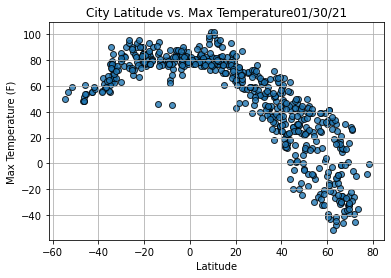

In [15]:
# Import the time module 
import time

# Build the scatter plot for latitude vs. max temperature 
plt.scatter(lats, 
           max_temps,
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

#### Plot Latitude vs. Humidity

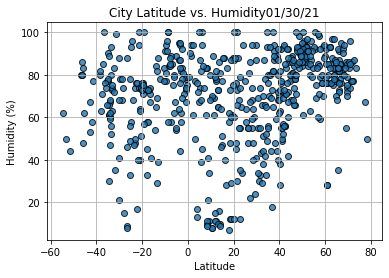

In [16]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

#### Plot Latitude vs. Cloudiness

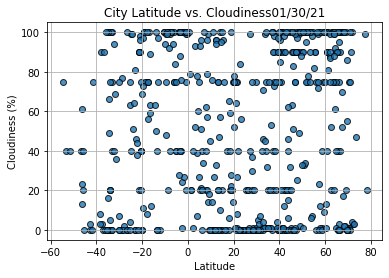

In [19]:
# Build the scatter plot for latitude and cloudiness.
plt.scatter(lats, 
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

#### Plot Latitude vs. Wind Speed 

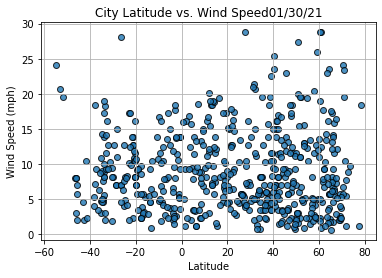

In [20]:
# Build the scatter plots for latitude vs. windspeed.
plt.scatter(lats, 
           wind_speed, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show the plot
plt.show()